In [2]:
import numpy as np
import pandas as pd

Text files containing PDF information are very easy to import as pandas data frame:

In [3]:
with open("output/pdfs_q2val_01.txt", "r") as f:
    dum = f.readline()
    a = pd.read_table(f,"\s+")


In [4]:
import matplotlib as plt
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *

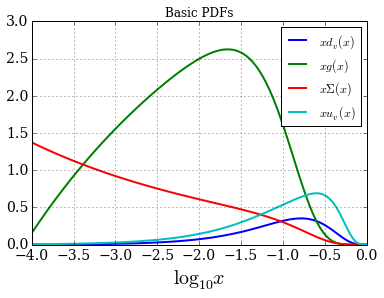

In [5]:
rcParams['ytick.labelsize'] = 14
rcParams['xtick.labelsize'] = 14
plt.rc('font', family='serif')

plot(log10(a.x),a.d_val,label='$xd_v(x)$',linewidth=2)
plot(log10(a.x),(a.g),label='$xg(x)$',linewidth=2)
plot(log10(a.x),a.sea,label='$x\Sigma(x)$',linewidth=2)
plot(log10(a.x),a.u_val,label='$xu_v(x)$',linewidth=2)

title('Basic PDFs')
legend()
xlabel('$ \log_{10} x$', fontsize=20)
grid(True)

# savefig("apppp.png")


It is straight forward to interface python and fortran programs. For example, for HAverager, we already have this implemented: 

In [6]:
from  haverage import *
print haverage.__doc__

dataout,statout,systout = haverage(datain,statin,systin,[nmeasin,ndatain,nsystin])

Wrapper for ``haverage``.

Parameters
----------
datain : input rank-2 array('d') with bounds (ndatain,nmeasin)
statin : input rank-2 array('d') with bounds (ndatain,nmeasin)
systin : input rank-3 array('d') with bounds (nsystin,ndatain,nmeasin)

Other Parameters
----------------
nmeasin : input int, optional
    Default: shape(datain,1)
ndatain : input int, optional
    Default: shape(datain,0)
nsystin : input int, optional
    Default: shape(systin,0)

Returns
-------
dataout : rank-1 array('d') with bounds (ndatain)
statout : rank-1 array('d') with bounds (ndatain)
systout : rank-2 array('d') with bounds (nsystin,ndatain)



Below is a simple example of an average for two measurements with 3 data points each:

In [7]:
e = array([[0.1,0.1],[0.1,0.1],[0.1,0.1]])
d = array([[1.,1.1],[2.,2.1],[3.,3.1]])
s = array([[[-0.05,0.04],[-0.05,0.04],[-0.05,0.04]]])


t,u,f = haverage(d,e,s)

print (t)
print (u)
print (f)


[ 1.05304742  2.05304742  3.05304742]
[ 0.07079045  0.07079045  0.07079045]
[[-0.00335957 -0.00335957 -0.00335957]]


Data table format can be defined inside python, by declairing columns as bin, cross section, systematic uncertainty:

In [10]:
# define bins, can be several:
bins = ["bin"]
# define sigma to be averaged:
sigma = "data"
# define errors (can have modifiers for statistical, uncor, additive, multiplicative ...)
errors = ["stat:Stat","sys1","sys2:A"]


Data can be adjusted before the fit, e.g. covariance matrix can be transformed to nuisance parameter representation using Cholevsky transformation:

In [14]:
nrep = 100
ndat = 5
a = random.random_sample(nrep*ndat).reshape(nrep,ndat)

In [15]:
ave = average(a,axis=0)
a1 = a - ave
# covariance:
cov = 1/(nrep-1.)*sum(a1[:,newaxis,:]*a1[:,:,newaxis],axis=0)

from scipy.linalg import *
L = cholesky(cov,lower = True)

print L

[[ 0.3081122   0.          0.          0.          0.        ]
 [ 0.02579947  0.28824905  0.          0.          0.        ]
 [ 0.04249554 -0.00427549  0.29130316  0.          0.        ]
 [ 0.0014527  -0.00045158 -0.01724271  0.28065704  0.        ]
 [ 0.02800136  0.02697338 -0.00159771  0.01525029  0.29783007]]
